# 第十四章 scikit-learn 库

**scikit-learn 库是当今最流行的机器学习算法库之一**

**可用来解决分类与回归问题**

**本章以鸢尾花数据集为例，简单了解八大传统机器学习分类算法的sk-learn实现**

**欲深入了解传统机器算法的原理和公式推导，请继续学习《统计学习方法》或《西瓜书》**

## 14.0 鸢尾花数据集

【1】下载数据集

In [2]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")

【2】数据集的查看

In [6]:
type(iris)

pandas.core.frame.DataFrame

In [7]:
iris.shape

(150, 5)

In [8]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

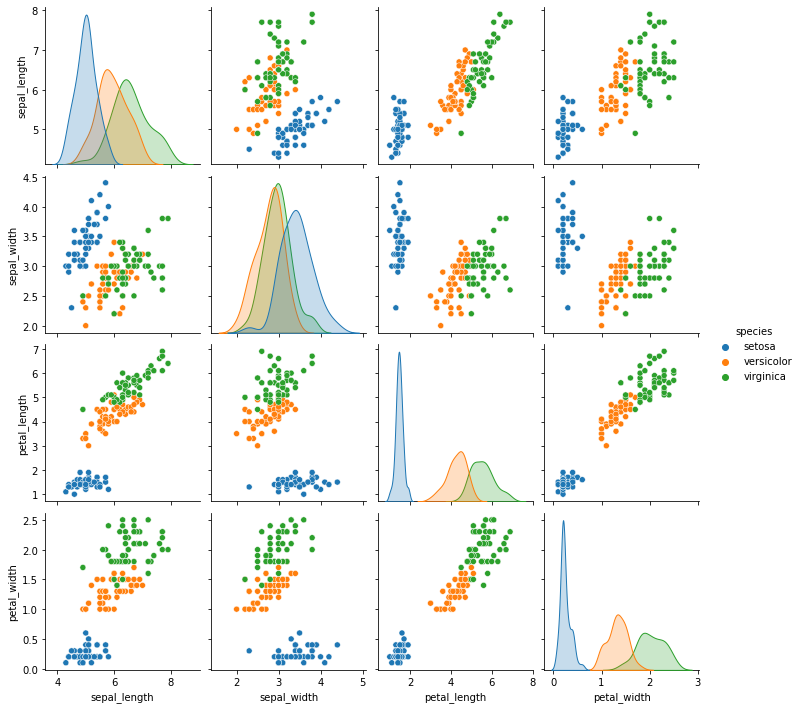

In [10]:
sns.pairplot(data=iris, hue="species")

【3】数据清洗

In [14]:
iris_simple = iris.drop(["sepal_length", "sepal_width"], axis=1)
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


【4】标签编码

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple["species"] = encoder.fit_transform(iris_simple["species"])

In [17]:
iris_simple

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
7,1.5,0.2,0
8,1.4,0.2,0
9,1.5,0.1,0


【5】数据集的标准化（本数据集特征比较接近，实际处理过程中未标准化）

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [23]:
trans = StandardScaler()
_iris_simple = trans.fit_transform(iris_simple[["petal_length", "petal_width"]])
_iris_simple = pd.DataFrame(_iris_simple, columns = ["petal_length", "petal_width"])
_iris_simple.describe()

,petal_length,petal_width
count,1.500000e+02,1.500000e+02
mean,-8.652338e-16,-4.662937e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


【6】构建训练集和测试集（本课暂不考虑验证集）

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_simple, test_size=0.2)
test_set.head()

,petal_length,petal_width,species
3,1.5,0.2,0
111,5.3,1.9,2
24,1.9,0.2,0
5,1.7,0.4,0
92,4.0,1.2,1


In [25]:
iris_x_train = train_set[["petal_length", "petal_width"]]
iris_x_train.head()

,petal_length,petal_width
63,4.7,1.4
93,3.3,1.0
34,1.5,0.2
35,1.2,0.2
126,4.8,1.8


In [26]:
iris_y_train = train_set["species"].copy()
iris_y_train.head()

63     1
93     1
34     0
35     0
126    2
Name: species, dtype: int32

In [27]:
iris_x_test = test_set[["petal_length", "petal_width"]]
iris_x_test.head()

,petal_length,petal_width
3,1.5,0.2
111,5.3,1.9
24,1.9,0.2
5,1.7,0.4
92,4.0,1.2


In [28]:
iris_y_test = test_set["species"].copy()
iris_y_test.head()

3      0
111    2
24     0
5      0
92     1
Name: species, dtype: int32

## 14.1 k近邻算法

【1】基本思想

与待预测点最近的训练数据集中的k个邻居  
  
把k个近邻中最常见的类别预测为带预测点的类别

【2】sklearn实现

In [30]:
from sklearn.neighbors import KNeighborsClassifier

* 构建分类器对象

In [31]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

* 训练

In [32]:
clf.fit(iris_x_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

* 预测

In [33]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 翻转

In [34]:
encoder.inverse_transform(res)

array(['setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor'], dtype=object)

* 评估

In [35]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 存储数据

In [36]:
out = iris_x_test.copy()
out["y"] = iris_y_test
out["pre"] = res
out

,petal_length,petal_width,y,pre
3,1.5,0.2,0,0
111,5.3,1.9,2,2
24,1.9,0.2,0,0
5,1.7,0.4,0,0
92,4.0,1.2,1,1
57,3.3,1.0,1,1
1,1.4,0.2,0,0
112,5.5,2.1,2,2
106,4.5,1.7,2,1
136,5.6,2.4,2,2


In [37]:
out.to_csv("iris_predict.csv")

【3】可视化

In [39]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw(clf):

    # 网格化
    M, N = 500, 500
    x1_min, x2_min = iris_simple[["petal_length", "petal_width"]].min(axis=0)
    x1_max, x2_max = iris_simple[["petal_length", "petal_width"]].max(axis=0)
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1, t2)
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis=1)
    y_predict = clf.predict(x_show)
    
    # 配色
    cm_light = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0", "#A0A0FF"])
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])
    
    # 绘制预测区域图
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap=cm_light)
    
    # 绘制原始数据点
    plt.scatter(iris_simple["petal_length"], iris_simple["petal_width"], label=None,
                c=iris_simple["species"], cmap=cm_dark, marker='o', edgecolors='k')
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    
    # 绘制图例
    color = ["g", "r", "b"]
    species = ["setosa", "virginica", "versicolor"]
    for i in range(3):
        plt.scatter([], [], c=color[i], s=40, label=species[i])    # 利用空点绘制图例
    plt.legend(loc="best")
    plt.title('iris_classfier')

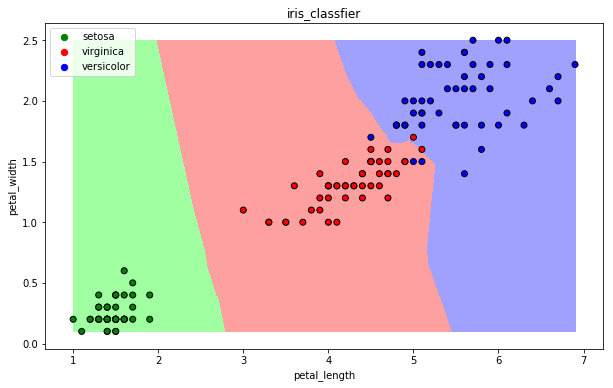

In [40]:
draw(clf)

## 14.2 朴素贝叶斯算法

【1】基本思想

当X=(x1, x2)发生的时候，哪一个yk发生的概率最大

【2】sklearn实现

In [46]:
from sklearn.naive_bayes import GaussianNB

* 构建分类器对象

In [ ]:
clf = GaussianNB()
clf

* 训练

In [ ]:
clf.fit(iris_x_train, iris_y_train)

* 预测

In [41]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 评估

In [42]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

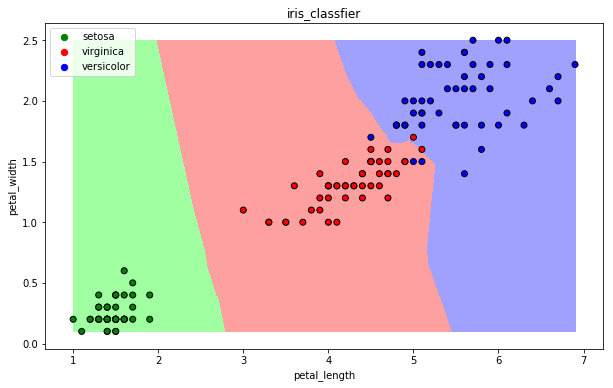

In [43]:
draw(clf)

## 14.3 决策树算法

【1】基本思想

CART算法：每次通过一个特征，将数据尽可能的分为纯净的两类，递归的分下去

【2】sklearn实现

In [45]:
from sklearn.tree import DecisionTreeClassifier

* 构建分类器对象

In [46]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

* 训练

In [47]:
clf.fit(iris_x_train, iris_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

* 预测

In [48]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 评估

In [49]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

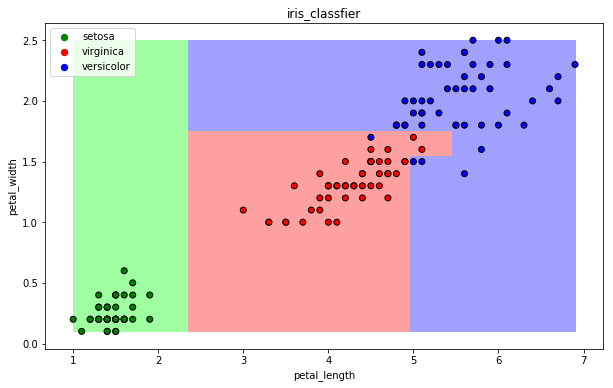

In [50]:
draw(clf)

## 14.4 逻辑回归算法

【1】基本思想

一种解释：
  
训练：通过一个映射方式，将特征X=（x1, x2） 映射成 P(y=ck), 求使得所有概率之积最大化的映射方式里的参数
  
预测：计算p(y=ck) 取概率最大的那个类别作为预测对象的分类

【2】sklearn实现

In [51]:
from sklearn.linear_model import LogisticRegression

* 构建分类器对象

In [52]:
clf = LogisticRegression(solver='saga', max_iter=1000)
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

* 训练

In [53]:
clf.fit(iris_x_train, iris_y_train)

C:\Users\ibm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

* 预测

In [54]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 评估

In [55]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

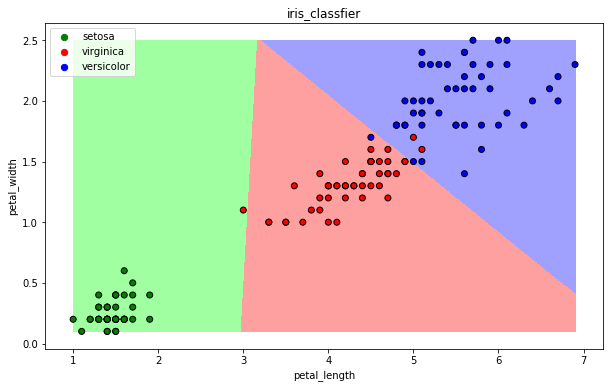

In [56]:
draw(clf)

## 14.5 支持向量机算法

【1】基本思想

以二分类为例，假设数据可用完全分开：
  
用一个超平面将两类数据完全分开，且最近点到平面的距离最大

【2】sklearn实现

In [57]:
from sklearn.svm import SVC

* 构建分类器对象

In [58]:
clf = SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

* 训练

In [59]:
clf.fit(iris_x_train, iris_y_train)

C:\Users\ibm\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

* 预测

In [60]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 评估

In [61]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

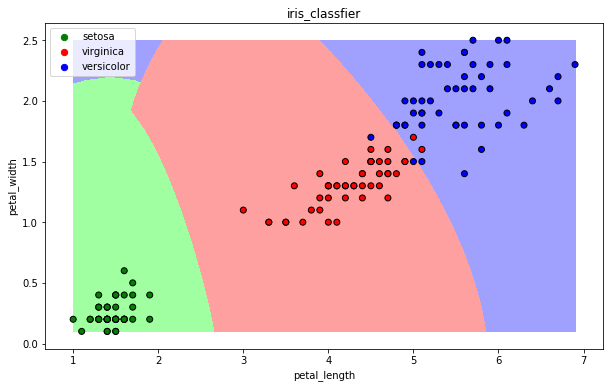

In [62]:
draw(clf)

## 14.7 集成方法——随机森林

【1】基本思想

训练集m，有放回的随机抽取m个数据，构成一组，共抽取n组采样集
  
n组采样集训练得到n个弱分类器   弱分类器一般用决策树或神经网络
  
将n个弱分类器进行组合得到强分类器

【2】sklearn实现

In [64]:
from sklearn.ensemble import RandomForestClassifier

* 构建分类器对象

In [65]:
clf = RandomForestClassifier()
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* 训练

In [66]:
clf.fit(iris_x_train, iris_y_train)

C:\Users\ibm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* 预测

In [67]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 评估

In [68]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

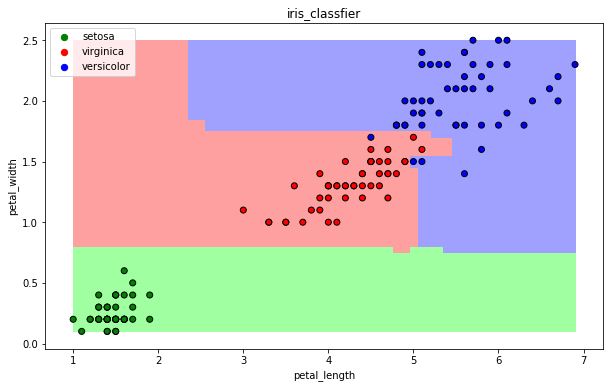

In [69]:
draw(clf)

## 14.7 集成方法——Adaboost

【1】基本思想

训练集m，用初始数据权重训练得到第一个弱分类器，根据误差率计算弱分类器系数，更新数据的权重
  
使用新的权重训练得到第二个弱分类器，以此类推
  
根据各自系数，将所有弱分类器加权求和获得强分类器

【2】sklearn实现

In [70]:
from sklearn.ensemble import AdaBoostClassifier

* 构建分类器对象

In [71]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

* 训练

In [72]:
clf.fit(iris_x_train, iris_y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

* 预测

In [73]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 评估

In [74]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

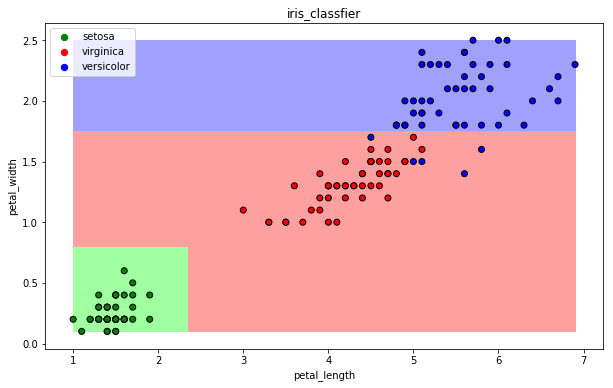

In [75]:
draw(clf)

## 14.8 集成方法——梯度提升树GBDT

【1】基本思想

训练集m，获得第一个弱分类器，获得残差，然后不断地拟合残差

所有弱分类器相加得到强分类器

【2】sklearn实现

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

* 构建分类器对象

In [78]:
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

* 训练

In [79]:
clf.fit(iris_x_train, iris_y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

* 预测

In [80]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 2 0 0 1 1 0 2 1 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]
[0 2 0 0 1 1 0 2 2 2 1 2 2 2 1 0 0 0 1 0 2 0 2 1 0 1 0 0 1 1]


* 评估

In [81]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率:{:.0%}".format(accuracy))

预测正确率:97%


* 可视化

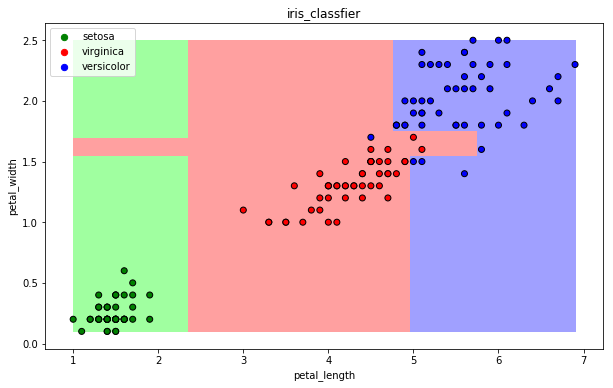

In [82]:
draw(clf)

## 14.9 大杀器

【1】xgboost

GBDT的损失函数只对误差部分做负梯度（一阶泰勒）展开
  
XGBoost损失函数对误差部分做二阶泰勒展开，更加准确，更快收敛

【2】lightgbm

微软：快速的，分布式的，高性能的基于决策树算法的梯度提升框架
  
速度更快

【3】stacking

堆叠或者叫模型融合

先建立几个简单的模型进行训练，第二级学习器会基于前级模型的预测结果进行再训练

【4】神经网络